In [1]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
print(f"TensorFlow: {tf.__version__}")

TensorFlow: 2.17.0


In [47]:
batch_size = 32
epochs = 30
target_size = (64, 64)
class_names = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [48]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
) 

In [49]:
training_set = train_datagen.flow_from_directory(
    'training_set',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 4317 images belonging to 5 classes.


In [50]:
training_set.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [51]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    'test_set',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 165 images belonging to 5 classes.


In [52]:
test_set.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [53]:
def get_images_from_flow(flow, num_images):
    images, labels = next(flow)
    return images[:num_images], labels[:num_images]

In [54]:
def plot_images(images, labels, class_names, num_rows, num_cols):
    plt.figure(figsize=(12, 6))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')
    plt.show()

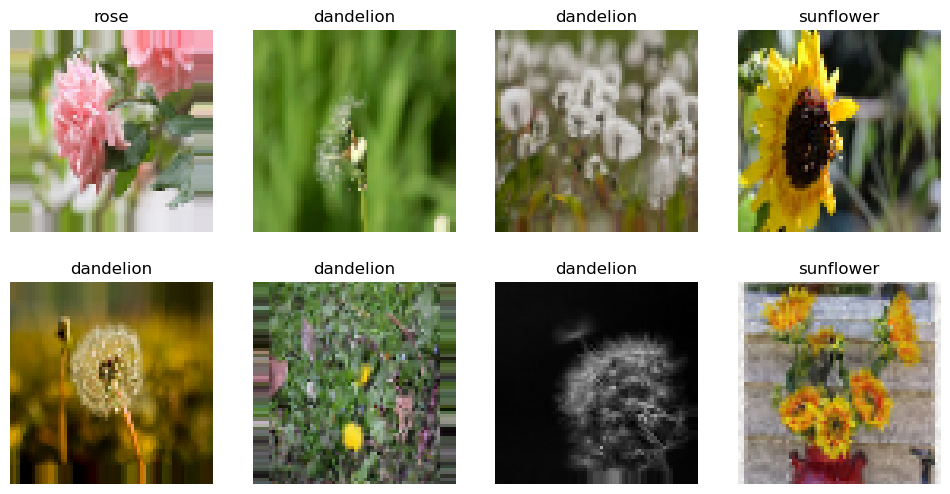

In [55]:
num_images = 8
images, labels = get_images_from_flow(training_set, num_images)
plot_images(images, labels, class_names, num_rows=2, num_cols=4)

In [10]:
#Layer
cnn = tf.keras.models.Sequential()

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=64 , kernel_size=3 , activation='relu' , input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\Users\Phan Tuan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=64 , kernel_size=3 , activation='relu' ))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2 , strides=2))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [14]:
cnn.add(tf.keras.layers.Flatten())

In [15]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [16]:
cnn.add(tf.keras.layers.Dense(units=5 , activation='softmax'))

In [17]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,645,125 (6.28 MB)

 Trainable params: 1,645,125 (6.28 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
#Thiết lập các thông số như thuật toán tối ưu hóa RMSprop, 
#hàm mất mát, chỉ số đánh giá acc
cnn.compile(optimizer = 'rmsprop' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])


In [19]:
# Thêm EarlyStopping và ModelCheckpoint để tối ưu hóa quá trình huấn luyện
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras',monitor='val_accuracy',
                                   save_best_only=True)

In [20]:
History = cnn.fit(
    x=training_set,
    validation_data=test_set,
    epochs=epochs,
    callbacks=[early_stopping, model_checkpoint]
) 
print("Huấn luyện mô hình đã hoàn tất và được lưu thành công.")

Epoch 1/30


C:\Users\Phan Tuan\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


135/135 ━━━━━━━━━━━━━━━━━━━━ 64s 455ms/step - accuracy: 0.3545 - loss: 1.4318 - val_accuracy: 0.6000 - val_loss: 0.9915
Epoch 2/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 67s 490ms/step - accuracy: 0.5585 - loss: 1.1005 - val_accuracy: 0.6303 - val_loss: 0.9043
Epoch 3/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 60s 439ms/step - accuracy: 0.6146 - loss: 0.9812 - val_accuracy: 0.6606 - val_loss: 0.8439
Epoch 4/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 60s 435ms/step - accuracy: 0.6440 - loss: 0.9105 - val_accuracy: 0.7515 - val_loss: 0.6704
Epoch 5/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 62s 448ms/step - accuracy: 0.6709 - loss: 0.8517 - val_accuracy: 0.7333 - val_loss: 0.6578
Epoch 6/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 58s 420ms/step - accuracy: 0.7028 - loss: 0.7809 - val_accuracy: 0.7394 - val_loss: 0.6818
Epoch 7/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 73s 531ms/step - accuracy: 0.7135 - loss: 0.7650 - val_accuracy: 0.7636 - val_loss: 0.5988
Epoch 8/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 74s 536ms/step - accuracy: 0.7210 - loss: 0.7435 - val

In [26]:
# Đánh giá mô hình trên tập dữ liệu kiểm tra
test_loss, test_accuracy = cnn.evaluate(test_set)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.8847 - loss: 0.2502
Test Accuracy: 90.91%


In [56]:
def get_predictions_from_model(cnn, data_generator, num_images):
   
    images, labels = next(data_generator)
    predictions = cnn.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(labels, axis=1)
    return images[:num_images], true_classes[:num_images], predicted_classes[:num_images]

In [57]:
def plot_predictions(images, true_classes, predicted_classes, class_names, num_rows, num_cols):

    plt.figure(figsize=(12, 6))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        
        # Kiểm tra và chuẩn hóa ảnh
        img = images[i]
        if img.max() > 1:  # [0, 1] chuẩn hóa ảnh
            img = img / 255.0
        
        plt.imshow(img)
        true_label = class_names[true_classes[i]]
        predicted_label = class_names[predicted_classes[i]]
        plt.title(f'Gốc: {true_label}\nDự đoán: {predicted_label}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


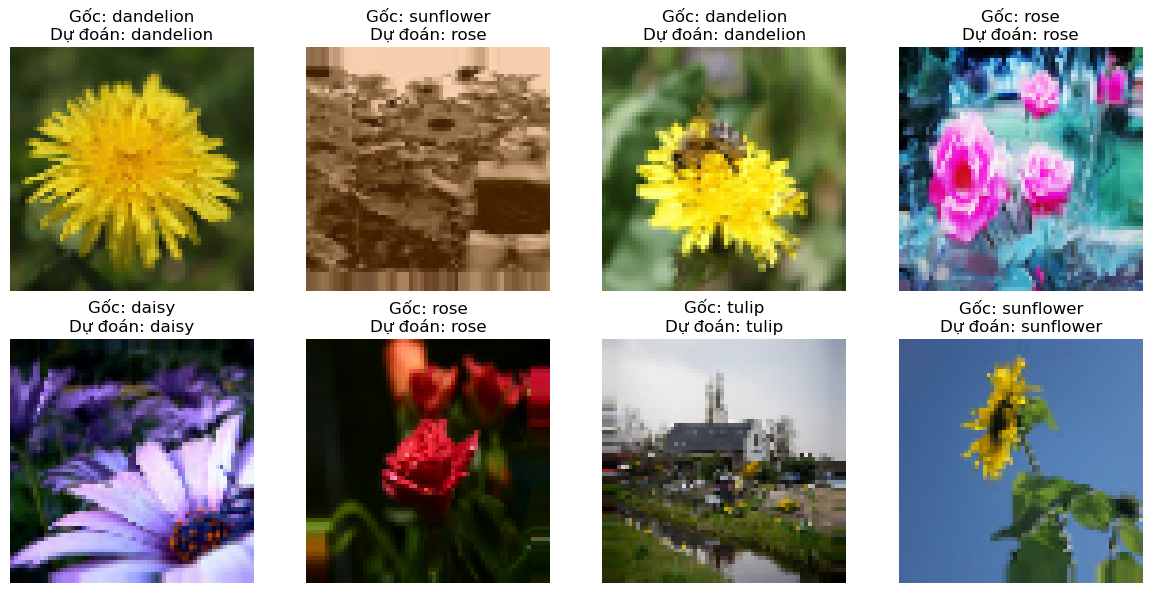

In [58]:
# Đã huấn luyện mô hình và đã có `cnn`
num_images = 8 
images, true_classes, predicted_classes = get_predictions_from_model(
    cnn, training_set, num_images)

# Vẽ ảnh với dự đoán
plot_predictions( images,  true_classes, 
                 predicted_classes, class_names, 
                 num_rows=2, num_cols=4)

In [36]:
loaded_model = tf.keras.models.load_model('best_model.keras')

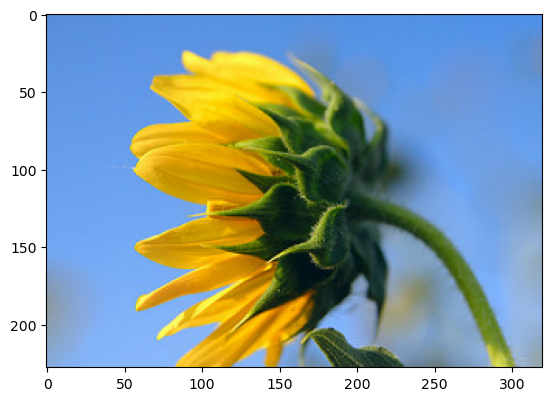

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Kết quả dự đoán: [[1.3121251e-04 5.6343426e-05 1.5150264e-09 9.9981242e-01 5.1963789e-10]]
Loại hoa được dự đoán: sunflower


In [60]:
# Dự đoán cho một ảnh cụ thể
test_image_path = 'prediction_set/sunflower.jpg'
test_image = Image.open(test_image_path)
plt.imshow(test_image)
plt.show()

# Thay đổi kích thước ảnh và chuẩn hóa
test_image_resized = test_image.resize(target_size)
test_image_array = np.expand_dims(np.array(test_image_resized) / 255.0, axis=0)

# Dự đoán kết quả
result = loaded_model.predict(test_image_array)
predicted_flower_name = class_names[np.argmax(result, axis=1)[0]]

print("Kết quả dự đoán:", result)
print("Loại hoa được dự đoán:", predicted_flower_name)

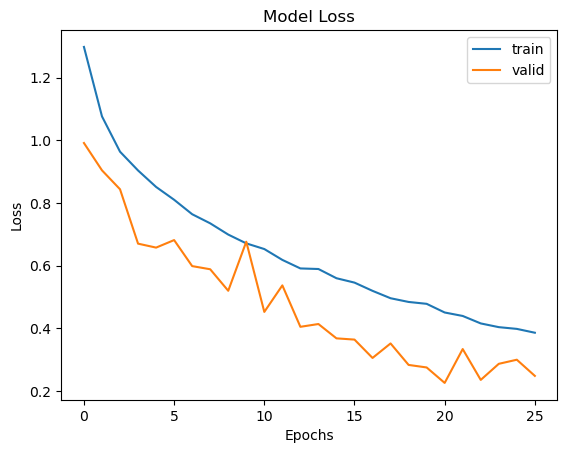

In [61]:
# Vẽ đồ thị hiệu suất
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'valid'])
plt.show()

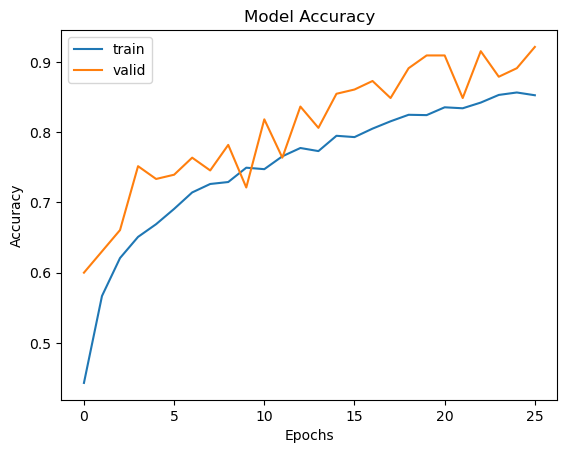

In [43]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'valid'])
plt.show()